In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import tensorflow as tf

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt 

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.layers import Dense

In [10]:
from tensorflow.keras.optimizers import Adam, SGD 

In [11]:
data = pd.read_csv("compresive_strength_concrete1.csv")

In [19]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),output
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
print(data.shape)

(1030, 9)


In [13]:
print(data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'output'],
      dtype='object')


In [14]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
output                                                   0
dtype: int64

In [23]:
data.isnull()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),output
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [15]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),output
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   object 
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   output                                           

In [17]:
from sklearn.preprocessing import LabelEncoder  

In [18]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),output
0,540.0,0.0,nh,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   object 
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   output                                           

In [20]:
corrmat = data.corr()

In [21]:
top_corr_features = corrmat.index

In [22]:
plt.figure(figsize= (20,20))


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

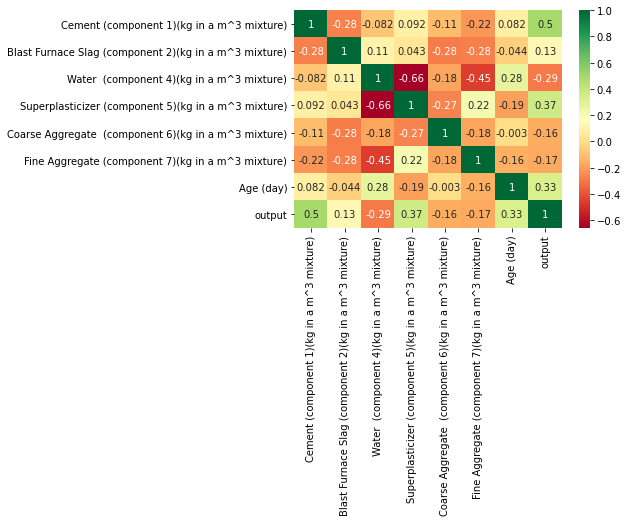

In [23]:
g=sns.heatmap(data[top_corr_features].corr(),annot =True,cmap ="RdYlGn")

In [25]:
data2= data[["Cement (component 1)(kg in a m^3 mixture)", "Superplasticizer (component 5)(kg in a m^3 mixture)" , "Age (day)", "output"]] 

In [26]:
data2.head()

,Cement (component 1)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),output
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


In [27]:
print(data2.shape)

(1030, 4)


In [28]:
x= (data2.loc[:, data2.columns != "output"])

In [29]:
y= (data2.loc[:, data2.columns == "output"])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state = 42)

In [32]:
model = Sequential()
model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dense(1, input_shape = (3,)))
    

In [33]:
model.compile(optimizer = "rmsprop", loss ="mse", metrics = ["mae"])

In [34]:
model.fit(x_train, y_train, epochs = 500)

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

23/23 [==============================] - 0s 1ms/step - loss: 1142.4054 - mae: 26.3997
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 215.2255 - mae: 11.7770
Epoch 3/500
23/23 [==============================] - 0s 1ms/step - loss: 188.6013 - mae: 11.1227
Epoch 4/500
23/23 [==============================] - 0s 1ms/step - loss: 171.6520 - mae: 10.5002
Epoch 5/500
23/23 [==============================] - 0s 870us/step - loss: 160.6278 - mae: 10.1346
Epoch 6/500
23/23 [=

23/23 [==============================] - 0s 826us/step - loss: 91.0017 - mae: 7.5130
Epoch 78/500
23/23 [==============================] - 0s 870us/step - loss: 91.1479 - mae: 7.5858
Epoch 79/500
23/23 [==============================] - 0s 783us/step - loss: 88.8425 - mae: 7.4883
Epoch 80/500
23/23 [==============================] - 0s 783us/step - loss: 88.1585 - mae: 7.3805
Epoch 81/500
23/23 [==============================] - 0s 870us/step - loss: 90.2135 - mae: 7.3968
Epoch 82/500
23/23 [==============================] - 0s 1ms/step - loss: 90.6622 - mae: 7.4970
Epoch 83/500
23/23 [==============================] - 0s 826us/step - loss: 89.2179 - mae: 7.4642
Epoch 84/500
23/23 [==============================] - 0s 783us/step - loss: 91.8046 - mae: 7.4922
Epoch 85/500
23/23 [==============================] - 0s 870us/step - loss: 87.2365 - mae: 7.3797
Epoch 86/500
23/23 [==============================] - 0s 826us/step - loss: 87.0110 - mae: 7.3745
Epoch 87/500
23/23 [===============

23/23 [==============================] - 0s 1ms/step - loss: 84.4998 - mae: 7.2916
Epoch 161/500
23/23 [==============================] - 0s 1ms/step - loss: 82.9367 - mae: 7.2845
Epoch 162/500
23/23 [==============================] - 0s 739us/step - loss: 86.7310 - mae: 7.3877
Epoch 163/500
23/23 [==============================] - 0s 783us/step - loss: 83.9887 - mae: 7.2320
Epoch 164/500
23/23 [==============================] - 0s 826us/step - loss: 85.1123 - mae: 7.2871
Epoch 165/500
23/23 [==============================] - 0s 783us/step - loss: 84.7610 - mae: 7.2149
Epoch 166/500
23/23 [==============================] - 0s 826us/step - loss: 83.7206 - mae: 7.1965
Epoch 167/500
23/23 [==============================] - 0s 870us/step - loss: 83.4851 - mae: 7.2771
Epoch 168/500
23/23 [==============================] - 0s 826us/step - loss: 87.8771 - mae: 7.3918
Epoch 169/500
23/23 [==============================] - 0s 870us/step - loss: 81.9329 - mae: 7.1890
Epoch 170/500
23/23 [=======

23/23 [==============================] - 0s 826us/step - loss: 83.4723 - mae: 7.3021
Epoch 243/500
23/23 [==============================] - 0s 826us/step - loss: 84.0899 - mae: 7.1936
Epoch 244/500
23/23 [==============================] - 0s 826us/step - loss: 83.7789 - mae: 7.2726
Epoch 245/500
23/23 [==============================] - 0s 826us/step - loss: 84.0133 - mae: 7.2983
Epoch 246/500
23/23 [==============================] - 0s 870us/step - loss: 83.0002 - mae: 7.2462
Epoch 247/500
23/23 [==============================] - 0s 913us/step - loss: 84.8466 - mae: 7.2854
Epoch 248/500
23/23 [==============================] - 0s 826us/step - loss: 85.4965 - mae: 7.2838
Epoch 249/500
23/23 [==============================] - 0s 826us/step - loss: 82.4607 - mae: 7.2342
Epoch 250/500
23/23 [==============================] - 0s 826us/step - loss: 81.3995 - mae: 7.2048
Epoch 251/500
23/23 [==============================] - 0s 826us/step - loss: 82.0092 - mae: 7.1520
Epoch 252/500
23/23 [===

Epoch 325/500
23/23 [==============================] - 0s 913us/step - loss: 80.5211 - mae: 7.0719
Epoch 326/500
23/23 [==============================] - 0s 957us/step - loss: 81.6550 - mae: 7.1218
Epoch 327/500
23/23 [==============================] - 0s 826us/step - loss: 80.9982 - mae: 7.1459
Epoch 328/500
23/23 [==============================] - 0s 870us/step - loss: 81.7250 - mae: 7.1858
Epoch 329/500
23/23 [==============================] - 0s 1ms/step - loss: 79.0993 - mae: 7.0532
Epoch 330/500
23/23 [==============================] - 0s 826us/step - loss: 82.4186 - mae: 7.2638
Epoch 331/500
23/23 [==============================] - 0s 826us/step - loss: 81.8942 - mae: 7.2242
Epoch 332/500
23/23 [==============================] - 0s 783us/step - loss: 81.7269 - mae: 7.1548
Epoch 333/500
23/23 [==============================] - ETA: 0s - loss: 100.3435 - mae: 7.462 - 0s 870us/step - loss: 79.8700 - mae: 7.1016
Epoch 334/500
23/23 [==============================] - 0s 869us/step - 

Epoch 407/500
23/23 [==============================] - 0s 870us/step - loss: 80.5289 - mae: 7.1165
Epoch 408/500
23/23 [==============================] - 0s 870us/step - loss: 78.5989 - mae: 7.0399
Epoch 409/500
23/23 [==============================] - 0s 870us/step - loss: 80.2697 - mae: 6.9913
Epoch 410/500
23/23 [==============================] - 0s 783us/step - loss: 78.2645 - mae: 7.0571
Epoch 411/500
23/23 [==============================] - 0s 826us/step - loss: 78.7117 - mae: 7.0507
Epoch 412/500
23/23 [==============================] - 0s 826us/step - loss: 79.0436 - mae: 7.0517
Epoch 413/500
23/23 [==============================] - 0s 913us/step - loss: 80.2034 - mae: 7.0750
Epoch 414/500
23/23 [==============================] - 0s 870us/step - loss: 78.9697 - mae: 7.0781
Epoch 415/500
23/23 [==============================] - 0s 913us/step - loss: 80.2776 - mae: 7.0337
Epoch 416/500
23/23 [==============================] - 0s 870us/step - loss: 79.2247 - mae: 7.0399
Epoch 417/

23/23 [==============================] - 0s 957us/step - loss: 77.1589 - mae: 6.9680
Epoch 490/500
23/23 [==============================] - 0s 1ms/step - loss: 77.9342 - mae: 7.0502
Epoch 491/500
23/23 [==============================] - 0s 913us/step - loss: 77.7910 - mae: 7.0859
Epoch 492/500
23/23 [==============================] - 0s 1ms/step - loss: 77.6012 - mae: 7.0722
Epoch 493/500
23/23 [==============================] - 0s 913us/step - loss: 77.8854 - mae: 6.9880
Epoch 494/500
23/23 [==============================] - 0s 957us/step - loss: 78.0711 - mae: 7.0070
Epoch 495/500
23/23 [==============================] - 0s 826us/step - loss: 76.8150 - mae: 6.9501
Epoch 496/500
23/23 [==============================] - 0s 913us/step - loss: 78.3732 - mae: 7.0498
Epoch 497/500
23/23 [==============================] - 0s 870us/step - loss: 77.0081 - mae: 6.9271
Epoch 498/500
23/23 [==============================] - 0s 826us/step - loss: 78.9401 - mae: 7.0875
Epoch 499/500
23/23 [=======

In [48]:
y_pred = model.predict(x_test)

In [50]:
print(y_pred.shape)

(309, 1)


In [51]:
print(y_pred)

[[39.117893 ]
 [34.527184 ]
 [50.397305 ]
 [29.750849 ]
 [26.121883 ]
 [40.891792 ]
 [26.9029   ]
 [57.55506  ]
 [33.32122  ]
 [44.81832  ]
 [43.994022 ]
 [13.065284 ]
 [39.411537 ]
 [31.46523  ]
 [24.66209  ]
 [15.493969 ]
 [41.56578  ]
 [16.428402 ]
 [40.483673 ]
 [23.254288 ]
 [29.469387 ]
 [24.228872 ]
 [50.546455 ]
 [ 8.456413 ]
 [28.151247 ]
 [37.086815 ]
 [15.367693 ]
 [43.994022 ]
 [52.172974 ]
 [15.704597 ]
 [39.587433 ]
 [38.639717 ]
 [27.456663 ]
 [56.701572 ]
 [14.561597 ]
 [33.91375  ]
 [33.61135  ]
 [39.462852 ]
 [11.557153 ]
 [51.491943 ]
 [18.524565 ]
 [ 6.33112  ]
 [27.014154 ]
 [52.303253 ]
 [17.798622 ]
 [57.920692 ]
 [50.34573  ]
 [43.047752 ]
 [31.62188  ]
 [ 7.3830757]
 [40.38885  ]
 [30.391685 ]
 [27.513752 ]
 [13.553546 ]
 [47.485027 ]
 [30.647099 ]
 [27.656834 ]
 [16.504171 ]
 [40.019787 ]
 [27.999807 ]
 [39.508038 ]
 [15.367853 ]
 [41.77794  ]
 [39.817337 ]
 [25.077652 ]
 [27.637705 ]
 [38.201523 ]
 [26.876833 ]
 [39.757774 ]
 [32.720863 ]
 [13.600008 ]
 [23.0

In [35]:
print(x_test)

     Cement (component 1)(kg in a m^3 mixture)  \
31                                       266.0   
109                                      362.6   
136                                      389.9   
88                                       362.6   
918                                      145.0   
..                                         ...   
250                                      250.0   
377                                      376.0   
615                                      277.0   
9                                        475.0   
357                                      277.2   

     Superplasticizer (component 5)(kg in a m^3 mixture)  Age (day)  
31                                                 0.0          365  
109                                               11.6            7  
136                                               22.0           28  
88                                                11.6            3  
918                                              

In [36]:
print(data.head(16))

    Cement (component 1)(kg in a m^3 mixture)  \
0                                       540.0   
1                                       540.0   
2                                       332.5   
3                                       332.5   
4                                       198.6   
5                                       266.0   
6                                       380.0   
7                                       380.0   
8                                       266.0   
9                                       475.0   
10                                      198.6   
11                                      198.6   
12                                      427.5   
13                                      190.0   
14                                      304.0   
15                                      380.0   

    Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                 0.0       
1                                           

In [54]:
print(y_pred.shape)

(309, 1)


In [59]:
data2.shape

(1030, 4)

In [37]:
print(x)

      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Superplasticizer (component 5)(kg in a m^3 mixture)  Age (day)  
0                                                   2.5           28  
1                                                   2.5           28  
2                                                   0.0          270  
3                                                   0.0          365  
4                               

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 107.1414 - mae: 7.7618
